# hybrid Deep Learning Model

## preprocessing


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)


##Training the SOM


In [3]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


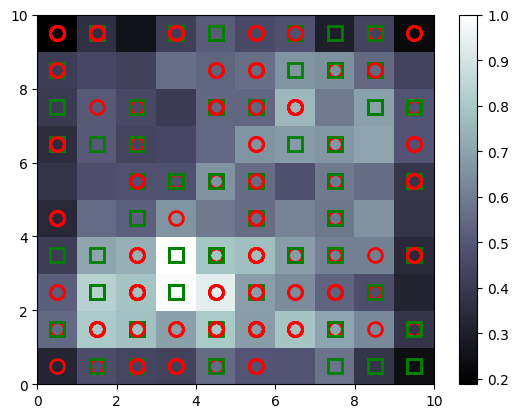

In [4]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [5]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15590434
15672894
15651868
15716082
15651460
15672637
15752344
15736533
15611409
15609987
15609758
15636454
15615296
15618258


#Part 2 - Going from Unsupervised to Supervised Deep Learning

In [6]:
#creating matrix of features
customers = dataset.iloc[:, 1:].values
#creating dependant variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [7]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [8]:
#building the ann
import tensorflow as tf
tf.__version__
#initializatoin
ann = tf.keras.models.Sequential()
#initializatoin
ann = tf.keras.models.Sequential()
#first input layer
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
#output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


2023-08-13 21:38:39.303963: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 21:38:39.369401: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 21:38:39.370432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 21:38:41.091488: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-13 21:38:42.841181: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

## Training the ANN on the Training set

In [9]:
#compiling 
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#training
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.3837 - accuracy: 0.9797
Epoch 2/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1732 - accuracy: 0.9797
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1012 - accuracy: 0.9797
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9797
Epoch 5/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.9797
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0613 - accuracy: 0.9797
Epoch 7/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0578 - accuracy: 0.9797
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0556 - accuracy: 0.9797
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0534 - accuracy: 0.9797
Epoch 10/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0518 - accuracy: 0.9797

## Predicting test set results

In [10]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

print(y_pred)

22/22 [==============================] - 0s 2ms/step
[[1.57997850e+07 9.51436789e-07]
 [1.57238270e+07 4.86322142e-06]
 [1.58154430e+07 6.41684665e-06]
 ...
 [1.57365330e+07 2.76853204e-01]
 [1.57523440e+07 2.76853204e-01]
 [1.56726370e+07 2.76853204e-01]]
